In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits
import healpy as hp

from astropy import units

In [2]:
import speclite.filters
from desispec.magnitude import compute_ab_mag

fluxunits = 1e-17 # units.erg / units.s / units.cm**2 / units.Angstrom

import speclite
import desispec
print(speclite.__version__)
print(desispec.__version__)


0.58.1


In [3]:
fn = '/global/cfs/cdirs/desi/spectro/redux/iron/exposures/20220420/00131089/stdstars-0-00131089.fits.gz'

In [4]:
ww = fitsio.read(fn, ext='WAVELENGTH')
print(ww.shape)
ff = fitsio.read(fn, ext='FLUX')
print(ff.shape)

(118456,)
(10, 118456)


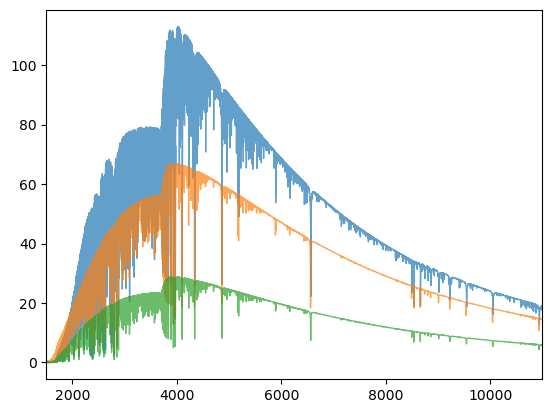

In [5]:
# plt.figure(figsize=(6, 6))
for index in range(3):
    plt.plot(ww, ff[index], lw=1, alpha=0.7)
plt.xlim(1500, 11000)
plt.show()

In [6]:
import speclite.filters

In [7]:
filt = speclite.filters.load_filter('MzLS-z')

for index in range(3):
    mag = filt.get_ab_magnitude(ff[index] * fluxunits, ww.copy())  # ww.copy() because get_ab_magnitude modifies it
    print(mag)

16.625457900578375
16.928130897530785
17.90202712413543


In [8]:
filt_ww, filt_tt = filt.wavelength.copy(), filt.response.copy()
compute_ab_mag(ww, ff[index], filt_ww, filt_tt)

17.90179697712521

In [9]:
for filt_name in ['sdss2010-u', 'decamDR1-g', 'decamDR1-r', 'decamDR1-i', 'decamDR1-z', 'decamDR1-Y']:
    print(filt_name)
    # filt = speclite.filters.load_filter('/global/u2/r/rongpu/moregit/speclite/speclite/data/filters/'+filt_name+'.ecsv')
    filt = speclite.filters.load_filter(filt_name)
    filt_ww, filt_tt = filt.wavelength.copy(), filt.response.copy()
    for index in range(len(ff)):
        mag1 = filt.get_ab_magnitude(ff[index] * fluxunits, ww.copy())  # ww.copy() because get_ab_magnitude modifies it
        mag2 = compute_ab_mag(ww, ff[index], filt_ww, filt_tt)
        print('speclite_mag - julien_mag (mmag) = {:.2f}'.format(1000*(mag1-mag2)))
    print()

sdss2010-u
speclite_mag - julien_mag (mmag) = -10.61
speclite_mag - julien_mag (mmag) = -8.85
speclite_mag - julien_mag (mmag) = -9.08
speclite_mag - julien_mag (mmag) = -11.45
speclite_mag - julien_mag (mmag) = -12.31
speclite_mag - julien_mag (mmag) = -10.69
speclite_mag - julien_mag (mmag) = -11.23
speclite_mag - julien_mag (mmag) = -13.08
speclite_mag - julien_mag (mmag) = -10.73
speclite_mag - julien_mag (mmag) = -11.55

decamDR1-g
speclite_mag - julien_mag (mmag) = -9.19
speclite_mag - julien_mag (mmag) = -11.18
speclite_mag - julien_mag (mmag) = -10.69
speclite_mag - julien_mag (mmag) = -13.31
speclite_mag - julien_mag (mmag) = -13.03
speclite_mag - julien_mag (mmag) = -11.92
speclite_mag - julien_mag (mmag) = -12.49
speclite_mag - julien_mag (mmag) = -11.04
speclite_mag - julien_mag (mmag) = -11.38
speclite_mag - julien_mag (mmag) = -12.92

decamDR1-r
speclite_mag - julien_mag (mmag) = -1.00
speclite_mag - julien_mag (mmag) = -2.32
speclite_mag - julien_mag (mmag) = -2.05
specl